# Variables

- An important first step to working with datasets is figuring out what kind of variables (columns in a dataframe) are present, and whether they are quantitative or categorical.

**Categorical**
- Ordinal variable categories that mantain an order like "top, bottom, middle"
- Binary variable nominal variables with two categories like "Yes No" or "True and False"
- Nominal variables vcategories with no order ranking like "names, countries, regions, and so on.


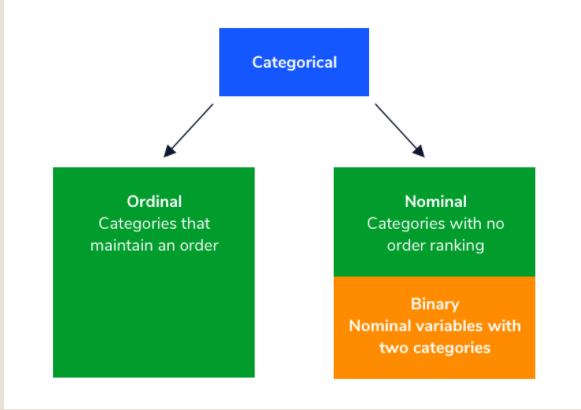

**Quantitative Variables**

- Discrete quantitative variables are counts, so they should be whole numbers (no decimals). For example, coupons counts the number of coupon promotions issued for a particular cereal, and the values are whole numbers without decimals. We can’t use half of a coupon at the local grocer! Likewise, vitamins contains only integer values, and further inspection with .unique() would show that there are only three possible values within the category.

- When identifying continuous variables, look for those values that are measured and in decimal form. Examples of continuous values in the cereal dataframe would be the **fiber, rating, and price variables,** as these are measured values that can be expressed with decimal precision.

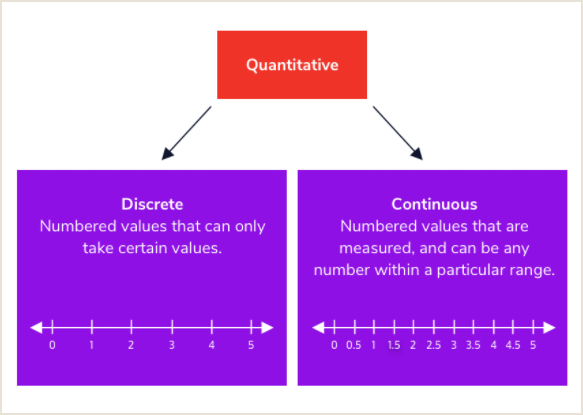

**Matching Quantitative Variables**

- for second step is to chec variables types in dataset, the way your data is stored. To do that you can make use of **dtypes** attribute or **df.info()**
- create a habit to check the types of variable in a dataset

In [3]:
import pandas as pd
import numpy as np

**Modify the data types of pandas dataframe**
- clean the missing fields by remiving them or replacing with a value that python can recognize it 

In [13]:
# create a dataframe with one variable, city_mpg, which represents the city miles per gallon of a vehicle 
df = pd.DataFrame({'city_mpg' :['21', '19', '24', '18', '17', 'missing', '20', '16', '15', 'missing'], 'rating' : ['PG', 'R', 'G', 'PG-13', 'UNRATED', 'NOT RATED', 'PG', 'R', 'G', 'PG-13']})
df

,city_mpg,rating
0,21,PG
1,19,R
2,24,G
3,18,PG-13
4,17,UNRATED
5,missing,NOT RATED
6,20,PG
7,16,R
8,15,G
9,missing,PG-13


In [19]:
# Replace missing values to None
df['city_mpg'] = df.city_mpg.replace(['missing'], np.nan)
df.city_mpg.unique()

array(['21', '19', '24', '18', '17', nan, '20', '16', '15'], dtype=object)

Now that all of our values are numeric strings, we can use the **astype()** method to alter the data type of the city-mpg variable to float. The **df.astype()** method is one of the most effective ways of altering the data type of a column.

In [20]:
#change data type 
df['city_mpg'] = df.city_mpg.astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
city_mpg    8 non-null float64
dtypes: float64(1)
memory usage: 208.0 bytes


In [21]:
# calculate the mean
np.mean(df.city_mpg)

18.75

A pattern with two groups will return a DataFrame with two columns. Non-matches will be NaN

In [10]:
# extract() function 
s = pd.Series(['a3', 'b4', 'c5'])
s.str.extract(r'([ab])(\d)')


,0,1
0,a,3
1,b,4
2,NaN,NaN


In [11]:
# Named groups will become column names in the result.
s.str.extract(r'(?P<letter>[abc])(?P<digit>\d)')

,letter,digit
0,a,3
1,b,4
2,c,5


**Pandas Category Data Type**
- For ordinal categorical variables, we often want to store two different pieces of information: category labels and their order. None of the data types we’ve covered so far can store both of these at once.
-  The pandas .Categorical() method can be used to store data as type category and indicate the order of the categories.

Example:

    movies['rating'] = pd.Categorical(movies['rating'], ['G', 'PG', 'PG-13', 'R','UNRATED', 'NOT RATED'], ordered=True)**
    clothes['Rating'] = df.Rating.Categorical(df.Rating, ['very unsatisfied', 'unsatisfied', 'neutral', 'satisfied', 'very satisfied'], order = True)**
- Now, not only does Python recognize that the rating column is an ordinal variable, it understands that G < PG < PG-13 < R < UNRATED < NOT RATED. If we call .unique() on this column again, we see how Python retains the correct rankings.

In [16]:
df['rating'] = pd.Categorical(df['rating'], ['G', 'PG', 'PG-13', 'R','UNRATED', 'NOT RATED'], ordered = True)
print(df.rating.unique())
print(df.head())

[PG, R, G, PG-13, UNRATED, NOT RATED]
Categories (6, object): [G < PG < PG-13 < R < UNRATED < NOT RATED]
  city_mpg   rating  rating_codes
0       21       PG             1
1       19        R             3
2       24        G             0
3       18    PG-13             2
4       17  UNRATED             4


**Label Encoding with .cat.codes**

- Label encoding is when we specifically convert each category in a variable to an integer. This enables us to perform numerical operations on the column and widen our range of plotting capabilities.

- In order to perform label encoding in pandas, we can use the .cat.codes accessor for any variable stored as type category. In the following example, the Education variable has four unique categories: high school diploma, associates, bachelors, and post doctorate. The .cat.codes accessor will convert the categories into numeric values:


In [15]:
df['rating_codes'] = df.rating.cat.codes
df

,city_mpg,rating,rating_codes
0,21,PG,1
1,19,R,3
2,24,G,0
3,18,PG-13,2
4,17,UNRATED,4
5,missing,NOT RATED,5
6,20,PG,1
7,16,R,3
8,15,G,0
9,missing,PG-13,2


**One-Hot Encoding**

- Another way of encoding categorical variables is called One-Hot Encoding (OHE). With OHE, we essentially create a new binary variable for each of the categories within our original variable. This technique is useful when managing nominal variables because it encodes the variable without creating an order among the categories.
- By passing in the dataset and column that we want to encode into pd.get_dummies(), we have created a new dataframe that contains three new binary variables with values of 1 for True and 0 for False, which we can view when we scroll to the right in the table. Now we haven’t assigned weighting to our nominal variable. It is important to note that OHE works best when we do not create too many additional variables, as increasing the dimensionality of our dataframe can create problems when working with certain machine learning models.
- **pandas.get_dummies()** is used for data manipulation. It converts categorical data into dummy or indicator variables.

In [18]:
df1 = pd.DataFrame({'name' :['petru', 'andy', 'yana', 'max', 'andreea', 'tamas', 'stefan', 'razvan'], 'educations' : ['barchelor', 'barchelor', 'high scool diploma', 'diploma', 'barchelor', 'doctorate', 'post doctorate', 'associates']})
df2 = pd.get_dummies(data = df1, prefix = 'ed' , columns = ['educations'], dtype = float, drop_first = True)
df2

,name,ed_barchelor,ed_diploma,ed_doctorate,ed_high scool diploma,ed_post doctorate
0,petru,1.0,0.0,0.0,0.0,0.0
1,andy,1.0,0.0,0.0,0.0,0.0
2,yana,0.0,0.0,0.0,1.0,0.0
3,max,0.0,1.0,0.0,0.0,0.0
4,andreea,1.0,0.0,0.0,0.0,0.0
5,tamas,0.0,0.0,1.0,0.0,0.0
6,stefan,0.0,0.0,0.0,0.0,1.0
7,razvan,0.0,0.0,0.0,0.0,0.0


**Review**

Variable Types Review

Discovered the different types of variables you will encounter when working with data and their corresponding data types in Python.
- Explored datasets with .head().
- Assessed categories within variables with the .unique() method.
- Practiced ways to check the data type of variables like the .dtypes attribute and .info() method.
- Altered data with the .replace() method.
- Learned how to change the data types of variables using the .astype() method.
- Investigated the pandas category data type.
- Developed your Label Encoding and One-Hot Encoding skills with the .cat.codes accessor and pd.get_dummies() method.